# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.062886e+01     8.088399e+00
 * time: 0.0050890445709228516
     1     2.770869e+01     5.752701e+00
 * time: 0.014968156814575195
     2     2.176561e+01     6.190025e+00
 * time: 0.03840804100036621
     3     1.289236e+01     1.831539e+00
 * time: 0.06614518165588379
     4     1.216012e+01     3.015025e+00
 * time: 0.08491110801696777
     5     1.164548e+01     1.500754e+00
 * time: 0.10354113578796387
     6     1.083342e+01     1.855701e+00
 * time: 0.12252998352050781
     7     1.046366e+01     2.209488e+00
 * time: 0.14122700691223145
     8     9.866879e+00     1.485772e+00
 * time: 0.1602780818939209
     9     9.315306e+00     1.421122e+00
 * time: 0.18009114265441895
    10     8.919242e+00     8.478983e-01
 * time: 0.1999680995941162
    11     8.712159e+00     5.811769e-01
 * time: 0.21984505653381348
    12     8.594761e+00     7.305394e-01
 * time: 0.23497319221496582
    13     8.511272e+00     3.247940e-01
 * time

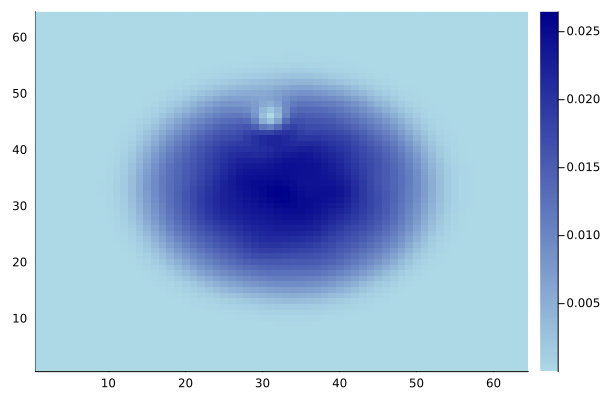

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)